In [2]:
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

In [3]:
# Python standard library imports
from typing import Self, Any
from random import sample

In [4]:
from numpy import ndarray

In [5]:
from matplotlib.pyplot import subplots, show

In [6]:
from keras.datasets.cifar10 import load_data as load_cifar10

In [7]:
# model building imports
from keras import Model, Sequential, Input

from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from keras.layers import LeakyReLU
from keras.ops import add
from keras.utils import to_categorical

In [8]:
# model training imports
from keras.optimizers import SGD
from keras.losses import CategoricalCrossentropy
from keras.metrics import CategoricalAccuracy, AUC, F1Score
from keras.callbacks import ModelCheckpoint, CSVLogger, LearningRateScheduler

In [9]:
# CIFAR-10

# specify input_shape and number of classes
input_shape = (32, 32, 3) # RGB
n_classes = 10

# 0. airplane
# 1. car
# 2. bird
# 3. cat
# 4. deer
# 5. dog
# 6. frog
# 7. horse
# 8. ship
# 9. truck

In [10]:
# get a sample images dataset
(X_train, y_train), (X_test, y_test) = load_cifar10()

In [11]:
def show_image(array: ndarray) -> None:
    """
    Prints image encoded as a numpy array (uint8)
    """

    figure, axis = subplots(frameon=False)
    axis.imshow(array, aspect="equal")
    axis.set_axis_off()
    show()

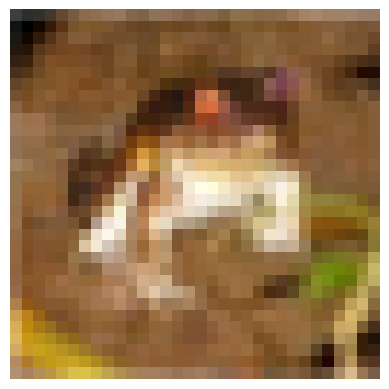

In [ ]:
# Show example
train_idx = 0
train_example = X_train[train_idx]
show_image(train_example)

In [ ]:
y_train[0]

array([6], dtype=uint8)

In [14]:
def normalize(array: ndarray) -> ndarray:
    """
    Converts the type of an ndarray to float32 and normalizes over the pixel
    range of values
    """

    return array.astype("float32") / 255.0

In [15]:
# for the sake of your precious RAM, sample the training and test set
# plus, normalize the images and convert the ys to one-hot
n_train, n_test = 1024, 128

train_idxs = sample(range(len(X_train)), k=n_train)
X_train = normalize(X_train[train_idxs])
y_train = to_categorical(y_train[train_idxs], n_classes)

test_idxs = sample(range(len(X_test)), k=n_test)
X_test = normalize(X_test[test_idxs])
y_test = to_categorical(y_test[test_idxs], n_classes)

In [16]:
# The 3 ways to build a deep learning model with keras:

In [17]:
# by calling Sequential:
model = Sequential(
    layers = [
        Input(shape=input_shape),
        Conv2D(filters=3 * 8, kernel_size=(3, 3), activation="relu"),
        MaxPooling2D(pool_size=(2, 2)),
        Conv2D(filters=3 * 16, kernel_size=(3, 3), activation="relu"),
        MaxPooling2D(pool_size=(2, 2)),
        Flatten(),
        # input size is infered
        Dense(n_classes, activation="softmax"),
    ],
    name = "my_tiny_sequential_cnn"
)

model.summary()

Model: "my_tiny_sequential_cnn"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 30, 30, 24)     │           672 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 15, 15, 24)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 13, 13, 48)     │        10,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 6, 6, 48)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1728)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 10)             │        17,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 28,378 (110.85 KB)

 Trainable params: 28,378 (110.85 KB)

 Non-trainable params: 0 (0.00 B)

In [18]:
def get_my_tiny_functional_cnn() -> Model:
    """
    Constructs "my_tiny_functional_cnn"
    """

    conv_layer_1 = Conv2D(
        filters=3 * 8,
        kernel_size=(3, 3),
        activation="relu",
        name="conv_layer_1"
    )
    max_pool_layer_1 = MaxPooling2D(pool_size=(2, 2), name="max_pool_layer_1")

    conv_layer_2 = Conv2D(
        filters=3 * 16,
        kernel_size=(3, 3),
        name="conv_layer_2"
    )
    act_layer_2 = LeakyReLU(negative_slope=0.3, name="act_layer_2")
    max_pool_layer_2 = MaxPooling2D(pool_size=(2, 2), name="max_pool_layer_2")

    flatten_layer = Flatten(name="flatten_layer")
    dense_layer = Dense(
        n_classes,
        activation="softmax",
        name="classification_head"
    )


    inputs = Input(shape=input_shape)
    x = inputs

    x = conv_layer_1(x)
    x = max_pool_layer_1(x)

    x = conv_layer_2(x)
    x = act_layer_2(x)
    x = max_pool_layer_2(x)

    x = flatten_layer(x)
    x = dense_layer(x)

    outputs = x

    return Model(inputs=inputs, outputs=outputs, name="my_tiny_functional_cnn")

In [19]:
model = get_my_tiny_functional_cnn()
model.summary()

Model: "my_tiny_functional_cnn"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 32, 32, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_layer_1 (Conv2D)           │ (None, 30, 30, 24)     │           672 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pool_layer_1 (MaxPooling2D) │ (None, 15, 15, 24)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_layer_2 (Conv2D)           │ (None, 13, 13, 48)     │        10,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ act_layer_2 (LeakyReLU)         │ (None, 13, 13, 48)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pool_layer_2 (MaxPooling2D) │ (None, 6, 6, 48)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_layer (Flatten)         │ (None, 1728)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ classification_head (Dense)     │ (None, 10)             │        17,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 28,378 (110.85 KB)

 Trainable params: 28,378 (110.85 KB)

 Non-trainable params: 0 (0.00 B)

In [20]:
class MyTinyCNN(Model):
    """
    MyTinyCNN class, inherets from keras' Model class
    """

    def __init__(self: Self, activation: str = "relu") -> None:
        """
        Initialization
        """

        super().__init__(name="my_tiny_oo_cnn")

        self.conv_layer_1 = Conv2D(
            filters=3 * 8,
            kernel_size=(3, 3),
            activation=activation,
            name="conv_layer_1"
        )
        self.max_pool_layer_1 = MaxPooling2D(
            pool_size=(2, 2),
            name="max_pool_layer_1"
        )

        # exemplify non-sequential nature of computation possible with
        # the functional and object-oriented methods
        self.conv_layer_2l = Conv2D(
            filters=3 * 16,
            kernel_size=(3, 3),
            activation=activation,
            name="conv_layer_2l",
            padding="same"
        )
        self.conv_layer_2r = Conv2D(
            filters=3 * 16,
            kernel_size=(2, 2),
            activation=activation,
            name="conv_layer_2r",
            padding="same"
        )
        self.max_pool_layer_2 = MaxPooling2D(
            pool_size=(2, 2),
            name="max_pool_layer_2"
        )

        self.flatten_layer = Flatten(name="flatten_layer")
        self.dense_layer = Dense(
            n_classes,
            activation="softmax",
            name="classification_head"
        )

    def call(self: Self, inputs: Any) -> Any:
        """
        Forward call
        """

        x = inputs

        x = self.conv_layer_1(x)
        x = self.max_pool_layer_1(x)

        # exemplify non-sequential nature of computation possible with
        # the functional and object-oriented methods
        x_l = self.conv_layer_2l(x)
        x_r = self.conv_layer_2r(x)
        x = add(x_l, x_r)
        x = self.max_pool_layer_2(x)

        x = self.flatten_layer(x)

        return  self.dense_layer(x)

In [21]:
# no output shape and number of parameters specified, why?
model = MyTinyCNN()
model.summary()

# inputs = Input(shape=input_shape)
# _ = model.call(inputs)
# model.summary()

Model: "my_tiny_oo_cnn"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv_layer_1 (Conv2D)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pool_layer_1 (MaxPooling2D) │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_layer_2l (Conv2D)          │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_layer_2r (Conv2D)          │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pool_layer_2 (MaxPooling2D) │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_layer (Flatten)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ classification_head (Dense)     │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [22]:
# Now let's train our MyTinyCNN:

In [23]:
epochs = 32
batch_size = 16

In [24]:
# What do we need? Model, optimizer, loss (at least)
model = MyTinyCNN()
optimizer = SGD(learning_rate=0.01, name="optimizer")
loss = CategoricalCrossentropy(name="loss")

# metrics
categorical_accuracy = CategoricalAccuracy(name="accuracy")
auc = AUC(name="auc")
f1_score = F1Score(average="macro", name="f1_score")
metrics = [categorical_accuracy, auc, f1_score]

# traces the computation
model.compile(loss=loss, optimizer=optimizer, metrics=metrics)

In [25]:
# train the model
_ = model.fit(
    X_train,
    y_train,
    batch_size=batch_size,
    epochs=epochs,
    validation_split=0.2
)

Epoch 1/32
52/52 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.1089 - auc: 0.4963 - f1_score: 0.0775 - loss: 2.3280 - val_accuracy: 0.1122 - val_auc: 0.5386 - val_f1_score: 0.0320 - val_loss: 2.2960
Epoch 2/32
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1111 - auc: 0.5650 - f1_score: 0.0633 - loss: 2.2787 - val_accuracy: 0.1024 - val_auc: 0.5914 - val_f1_score: 0.0455 - val_loss: 2.2630
Epoch 3/32
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2028 - auc: 0.6489 - f1_score: 0.1270 - loss: 2.2186 - val_accuracy: 0.1073 - val_auc: 0.5947 - val_f1_score: 0.0691 - val_loss: 2.2658
Epoch 4/32
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2135 - auc: 0.6734 - f1_score: 0.1457 - loss: 2.1752 - val_accuracy: 0.1659 - val_auc: 0.6474 - val_f1_score: 0.1099 - val_loss: 2.1988
Epoch 5/32
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2582 - auc: 0.7083 - f1_score: 0.2109 - loss: 2.1040 - val_accuracy: 0.1366 - val_auc: 0.6535 - val_f1_score: 0.0771 - val_loss: 2.3003


In [26]:
# evaluate on the test set
model.evaluate(
    X_test,
    y_test,
    batch_size=batch_size,
    return_dict=True,
    verbose=0
)

{'accuracy': 0.1171875,
 'auc': 0.7037827968597412,
 'f1_score': 0.09764189273118973,
 'loss': 2.743989944458008}

In [27]:
# predict on an example
test_idx = 0
test_example = X_test[test_idx : test_idx + 1]
true_test_example_class = y_test[test_idx]
true_test_example_class

array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [28]:
int(true_test_example_class.argmax())

0

In [29]:
test_example_probs = model.predict(test_example, verbose=0)
test_example_probs

array([[0.04488749, 0.00823335, 0.0112514 , 0.00832541, 0.01714579,
        0.7642167 , 0.00796869, 0.03353187, 0.04339263, 0.06104678]],
      dtype=float32)

In [30]:
int(test_example_probs.argmax())

5

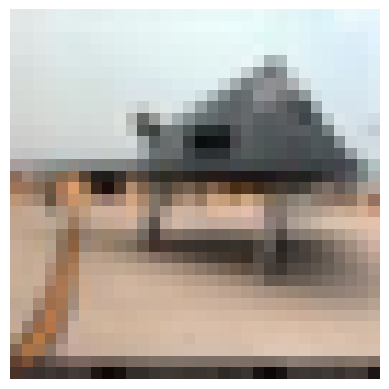

In [31]:
show_image(test_example[0])

In [ ]:
# Next class:
# Regularization